<a href="https://colab.research.google.com/github/perkykooky/NLP/blob/main/Text_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy as spacy
import numpy as np
import pandas as pd
import itertools
from itertools import groupby

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving raw_data.csv to raw_data.csv


In [ ]:
data = pd.read_csv('raw_data.csv')

In [ ]:
data

name  ...                      industry
0                b'A Cottage Collection'  ...                   Hospitality
1         b'Codeblue Wellington Limited'  ...        Information Technology
2                          b'Ashby Show'  ...  Media and Telecommunications
3                     b'MCIS Consulting'  ...         Professional Services
4              b'Adirondack Restaurants'  ...                   Hospitality
...                                  ...  ...                           ...
4995                 b'KZN Legisslature'  ...                    Government
4996                        b'SW Colour'  ...         Professional Services
4997                           b'LilahV'  ...                        Retail
4998                             b'Tuzo'  ...        Information Technology
4999  b'Calgary TELUS Convention Centre'  ...         Professional Services

[5000 rows x 7 columns]

In [ ]:
def clean_name(name):
    if name[1] and name[-1] == "'":
        return name[2:-1]
    else:
        return name

In [ ]:
# Checking the function works
clean_name(data.iloc[3,0])

'MCIS Consulting'

In [ ]:
data['clean_name'] = data['name'].apply(lambda x: clean_name(x))
data

name  ...                       clean_name
0                b'A Cottage Collection'  ...             A Cottage Collection
1         b'Codeblue Wellington Limited'  ...      Codeblue Wellington Limited
2                          b'Ashby Show'  ...                       Ashby Show
3                     b'MCIS Consulting'  ...                  MCIS Consulting
4              b'Adirondack Restaurants'  ...           Adirondack Restaurants
...                                  ...  ...                              ...
4995                 b'KZN Legisslature'  ...                 KZN Legisslature
4996                        b'SW Colour'  ...                        SW Colour
4997                           b'LilahV'  ...                           LilahV
4998                             b'Tuzo'  ...                             Tuzo
4999  b'Calgary TELUS Convention Centre'  ...  Calgary TELUS Convention Centre

[5000 rows x 8 columns]

In [ ]:
len(list(data['region'].unique()))

5

In [ ]:
len(list(data['industry'].unique()))

18

In [ ]:
frequency = pd.DataFrame(data.groupby('industry')['name'].count()).sort_values(by = 'name', ascending=False).reset_index().rename(columns={'name':'count'})
frequency['perc'] = frequency['count'].apply(lambda x: x/sum(frequency['count']))

In [ ]:
frequency

industry  count    perc
0          Professional Services   1100  0.2200
1         Information Technology    929  0.1858
2                  Manufacturing    666  0.1332
3                         Retail    491  0.0982
4                     Healthcare    357  0.0714
5                    Hospitality    250  0.0500
6             Financial Services    205  0.0410
7                     Non-profit    205  0.0410
8                     Government    195  0.0390
9                    Real Estate    180  0.0360
10                     Education    130  0.0260
11  Media and Telecommunications    116  0.0232
12                  Construction     79  0.0158
13    Transportation & Logistics     59  0.0118
14                   Agriculture     18  0.0036
15             Mining, Oil & Gas      9  0.0018
16                     Wholesale      7  0.0014
17                     Utilities      4  0.0008

In [ ]:
sum(frequency['count'])

5000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
countries = list(data['country'].unique())
print(countries)

['US', 'NZ', 'GB', 'ES', 'BR', 'IT', 'DE', 'AU', 'FR', 'IN', 'NL', 'KE', 'SG', 'AE', 'QA', 'VG', 'JP', 'HR', 'PL', 'DK', 'NO', 'CH', 'CA', 'BE', 'UA', 'MY', 'CN', 'UY', 'SE', 'VE', 'FI', 'PT', 'LV', 'BG', 'MX', 'BD', 'AT', 'VN', 'SA', 'ZA', 'ZM', 'IL', 'TW', 'LT', 'TN', 'IE', 'TR', 'PR', 'EG', 'IR', 'EC', 'OM', 'AR', 'HK', 'CZ', 'RO', 'SI', 'PE', 'PK', 'RU', 'AG', 'CY', 'ID', 'KR', 'AS', 'CO', 'BH', 'GR', 'IM', 'ET', 'ZW', 'LU', 'TH', 'PH', 'NG', 'SS', 'CL', 'HU', 'LK', 'SK', 'NP', 'JO', 'DZ', 'BB', 'LB', 'EE', 'PA', 'IS', 'BM', 'NU', 'NI', 'MU', 'MT', 'GH', 'PY', 'RE', 'RS', 'VI', 'GG', 'DO', 'MN']


In [ ]:
data[['region', 'country']].drop_duplicates()

region country
0       NAS      US
1      APAC      NZ
2      EMEA      GB
7      EMEA      ES
8       LAD      BR
...     ...     ...
4194   EMEA      RS
4346    LAD      VI
4413   EMEA      GG
4725    LAD      DO
4862   APAC      MN

[101 rows x 2 columns]

In [ ]:
frequency_region = pd.DataFrame(data.groupby(['region'])['name'].count()).sort_values(by = 'name', ascending=False).reset_index().rename(columns={'name':'count'})
frequency_region['perc'] = frequency['count'].apply(lambda x: x/sum(frequency['count']))

In [ ]:
frequency_region

region  count    perc
0    NAS   2619  0.2200
1   EMEA   1567  0.1858
2   APAC    507  0.1332
3    LAD    210  0.0982
4  JAPAN     97  0.0714

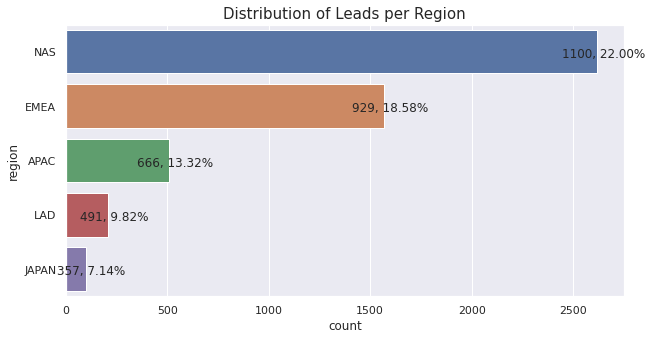

In [ ]:
plt.figure(figsize = (10,5))
sns.set_theme(style = 'darkgrid')
hist = sns.barplot(x = 'count', y ='region', data = frequency_region)
patches = hist.patches
for i in range(len(patches)):
    x = max(100, patches[i].get_width() + 30)
    y = patches[i].get_y() + 0.5
    hist.annotate('{}, {:.2f}%'.format(frequency.iloc[i,1],frequency.iloc[i,2]*100), (x,y), ha = 'center')
plt.title('Distribution of Leads per Region', fontsize = 15)
plt.show()

In [ ]:
frequency_region_cat = pd.DataFrame(data.groupby(['region', 'industry'])['name'].count()).sort_values(by = 'name', ascending=False).reset_index().rename(columns={'name':'count'})

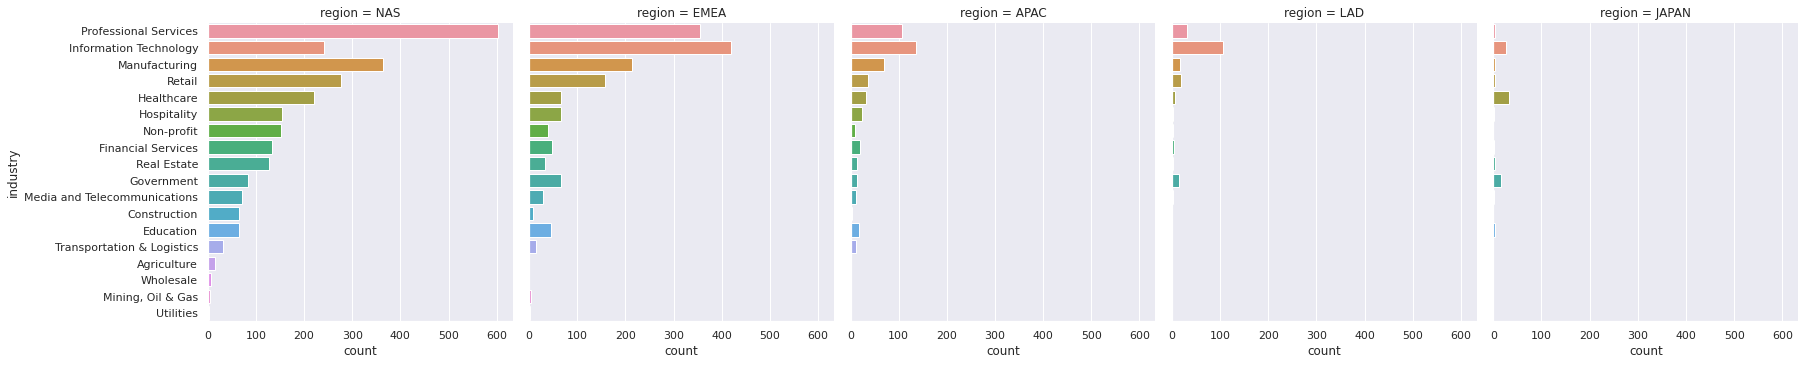

In [ ]:
sns.catplot(x = 'count', y = 'industry', col = 'region', data = frequency_region_cat, kind = 'bar')

In [ ]:
plt.figure(figsize = (10,5))
sns.set_theme(style = 'darkgrid')
hist = sns.barplot(x = 'count', y = 'industry', data = frequency)
patches = hist.patches
for i in range(len(patches)):
    x = max(100, patches[i].get_width() + 30)
    y = patches[i].get_y() + 0.5
    hist.annotate('{}, {:.2f}%'.format(frequency.iloc[i,1],frequency.iloc[i,2]*100), (x,y), ha = 'center')
plt.title('Distribution of Leads per Industry', fontsize = 15)
plt.show()

## Cleaning and Tokenizing the Names

In [ ]:
import re
from spacy.lang.en import English
nlp = English()

In [ ]:
data['clean_name'] = data['clean_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9_\s]', '', x))
data['clean_name'] = data['clean_name'].apply(lambda x: x.lower())
data

name  ...                       clean_name
0                b'A Cottage Collection'  ...             a cottage collection
1         b'Codeblue Wellington Limited'  ...      codeblue wellington limited
2                          b'Ashby Show'  ...                       ashby show
3                     b'MCIS Consulting'  ...                  mcis consulting
4              b'Adirondack Restaurants'  ...           adirondack restaurants
...                                  ...  ...                              ...
4995                 b'KZN Legisslature'  ...                 kzn legisslature
4996                        b'SW Colour'  ...                        sw colour
4997                           b'LilahV'  ...                           lilahv
4998                             b'Tuzo'  ...                             tuzo
4999  b'Calgary TELUS Convention Centre'  ...  calgary telus convention centre

[5000 rows x 8 columns]

In [ ]:
def token(doc):
    vect = []
    token_list = nlp(doc)
    for a in token_list:
        if a.is_stop == False:
            vect.append(str(a))

    return vect


In [ ]:
data['tokens'] = data['clean_name'].apply(lambda x: token(x))
data['keywords'] = data['tokens'].apply(lambda x: ' '.join(map(str,x)))

In [ ]:
data

name  ...                         keywords
0                b'A Cottage Collection'  ...               cottage collection
1         b'Codeblue Wellington Limited'  ...      codeblue wellington limited
2                          b'Ashby Show'  ...                            ashby
3                     b'MCIS Consulting'  ...                  mcis consulting
4              b'Adirondack Restaurants'  ...           adirondack restaurants
...                                  ...  ...                              ...
4995                 b'KZN Legisslature'  ...                 kzn legisslature
4996                        b'SW Colour'  ...                        sw colour
4997                           b'LilahV'  ...                           lilahv
4998                             b'Tuzo'  ...                             tuzo
4999  b'Calgary TELUS Convention Centre'  ...  calgary telus convention centre

[5000 rows x 10 columns]

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

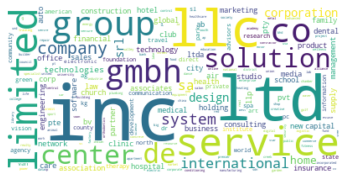

In [ ]:
import wordcloud
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(data['keywords']))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Additional Stop Words

Initial check on the most frequently occuring tokens and we see that these are not really insightful. These are typical company designations and so we will add these to our stopwords including other noise texts.
   <br>&emsp; &emsp; &emsp; - llc
   <br>&emsp; &emsp; &emsp; - gmbh
   <br>&emsp; &emsp; &emsp; - inc
   <br>&emsp; &emsp; &emsp; - co
   <br>&emsp; &emsp; &emsp; - company
   <br>&emsp; &emsp; &emsp; - ltd
   <br>&emsp; &emsp; &emsp; - limited
   <br>&emsp; &emsp; &emsp; - group
   <br>&emsp; &emsp; &emsp; - ltda
   <br>&emsp; &emsp; &emsp; - de
   <br>&emsp; &emsp; &emsp; - pvt
   <br>&emsp; &emsp; &emsp; etc
   


In [ ]:
co_stopwords = ['llc', 'gmbh', 'inc', 'co', 'company', 'ltd', 'limited', 'group', 'ltda', 'de', 'pvt', 'llp', 'srl', 'sa']

In [ ]:
def wordcloud_generate(column, filter):
    word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(data[data[column] == filter]['keywords']))
    plt.figure(figsize=(10,5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(filter + ' Industry', fontsize = 15)
    plt.show()

In [ ]:
len(data['industry'].unique())

18

In [ ]:
def freq_table(column):
    a = []
    for x in data[data['industry'] == column]['tokens']:
        for y in x:
            if y not in co_stopwords and y.strip() != '':
                a.append(y)
    return pd.DataFrame.from_dict(dict(Counter(a)), orient = 'index', columns = ['freq']).sort_values(by = 'freq', ascending = False)

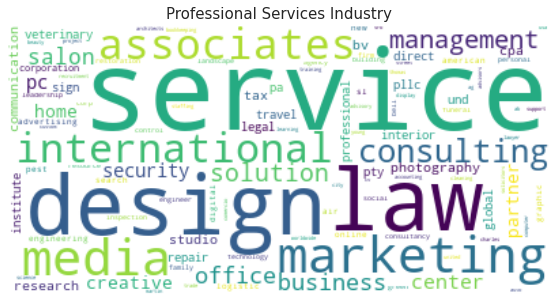

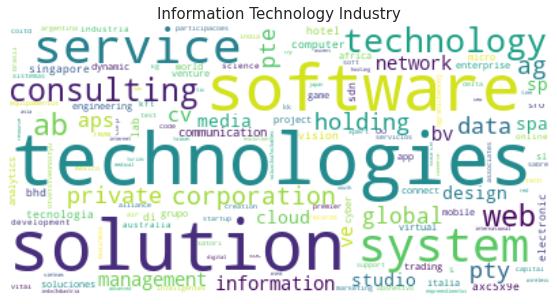

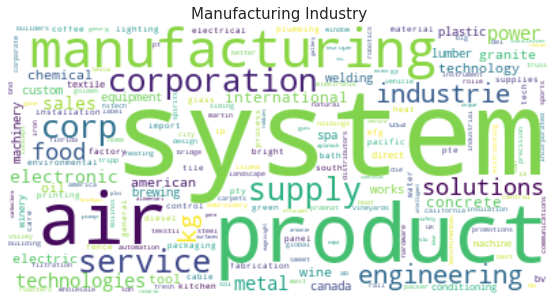

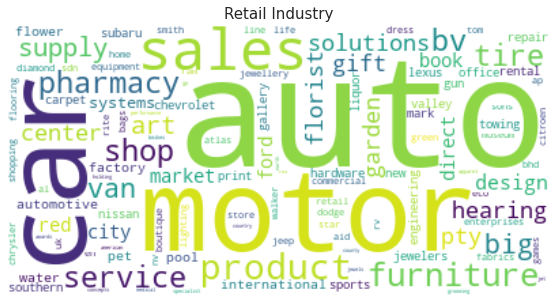

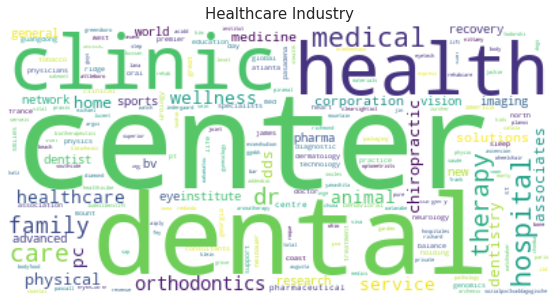

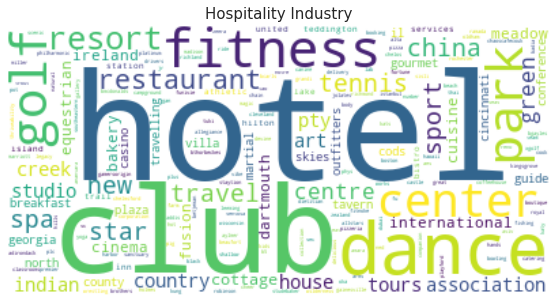

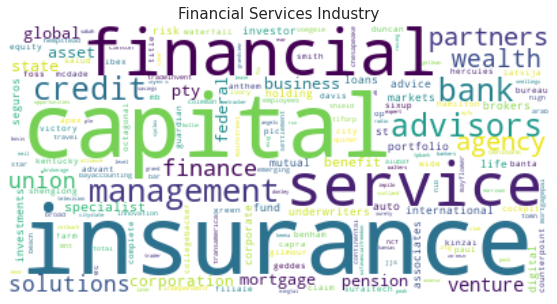

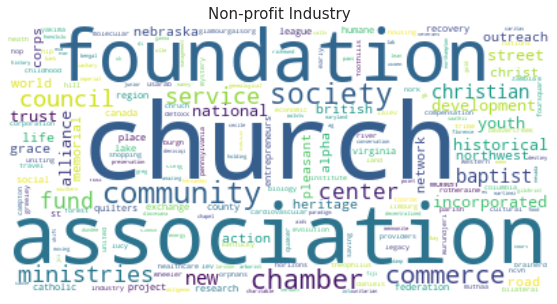

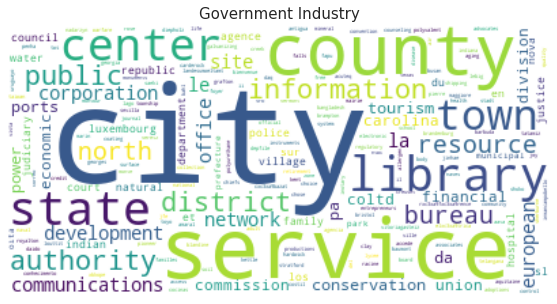

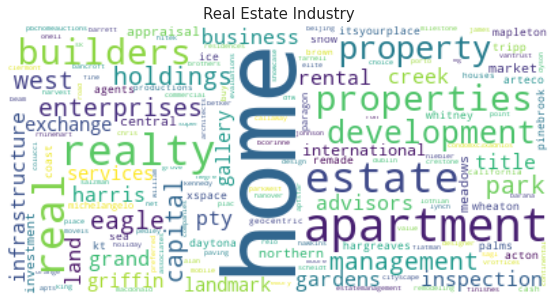

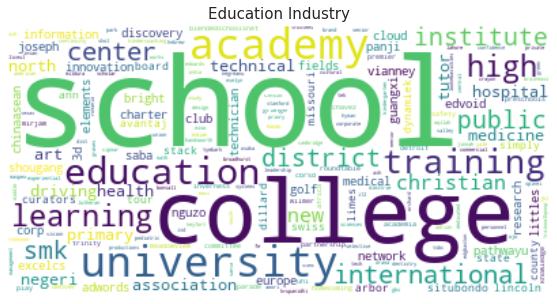

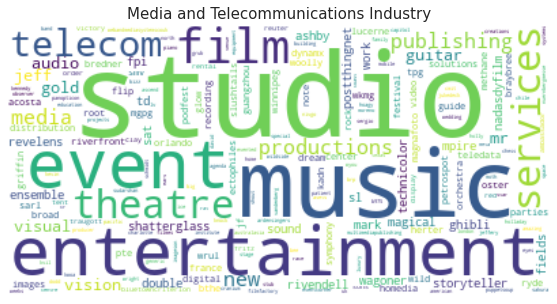

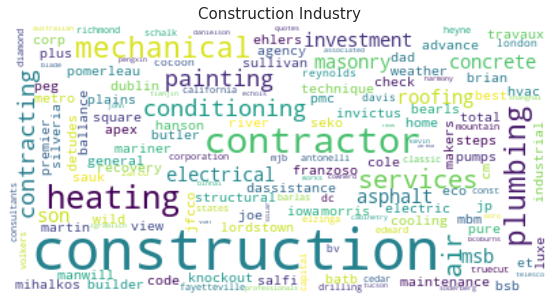

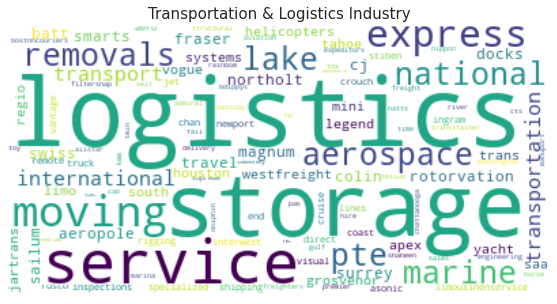

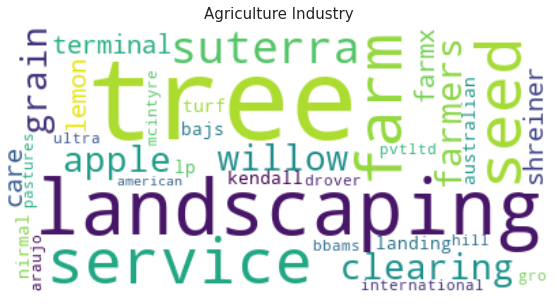

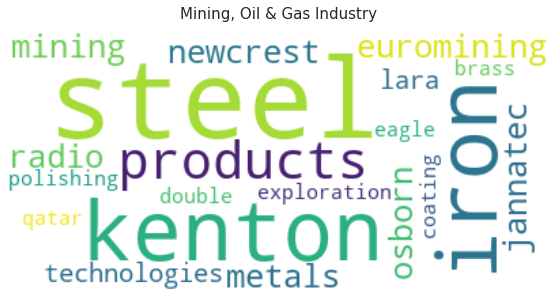

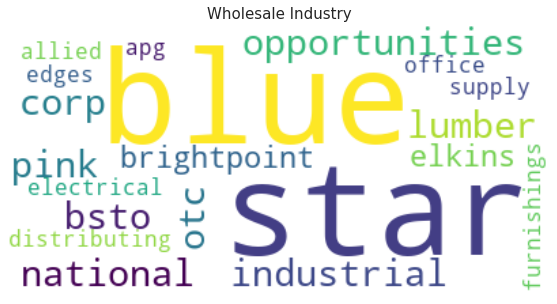

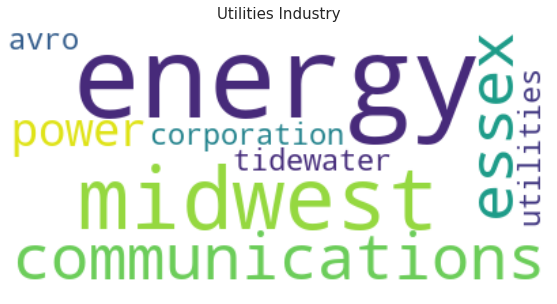

In [ ]:
for x in frequency['industry']:     
    wordcloud_generate('industry', x)

## Exploratory Analysis (for Top 3 Industries: Professional Services, Information Technology, Retail)


#### Professional Services

The companies under the Professional Services industry belong to the legal, marketing & advertising, consulting, & research services. It is quite notable that the 'Others' subindustry dominates the list -- which is an oppportunity to further inspect and infer the nature of the business through keywords. The values for these 'Others' category can be further imputed by doing a text classification model in the future. 

'Media' frequently occurs in the Professional Services. However these are mostly in the advertising industry and not to be confused with the Media companies in the Media & Telecom industry.

In [ ]:
freq_table('Professional Services').head(5)

NameError: ignored

In [ ]:
ps = data[data['industry'] == 'Professional Services']
psname'].groupby('subindustry').c['name'].sort_values(ascending = False)ount()me']

Inspecting the most frequent keywords in the Others subindustry, the words 'international', and 'service' dominate the list. These are inconclusive with respect to predicting their probable category and would rightly be in the Others section. However, there exists other keywords that seem to be miscategorized such as 'logistic', 'photography', 'home', 'travel', etc. Keyword 'research' also seems to better categorized in the Scientific Research and Development Services instead.

In [ ]:
# Word cloud of names in the professional services > Other Professional Scientific and Technical Services

word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(ps[ps['subindustry']=='Other Professional Scientific and Technical Services']['keywords']))
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Information Technology



Top keywords in the Information Technology Sector are concurrent with industry buzzwords. 

In [ ]:
it = data[data['industry'] == 'Information Technology']
pitgroupby('subindustry').count()['name'].sort_values(ascending = False)

In [ ]:
freq_table('Information Technology').head(5)

## Manufacturing Technology

Similar to Professional Servces, the Manufacturing industry also has bulk of 'Others'. Inspection of the companies belonging to this group shows that there is room for a classification model to infer the probable specific category. Specifically, 'lumber' -> Wood Products, 'metal', 'steel' -> Fabricated Metal, and Others

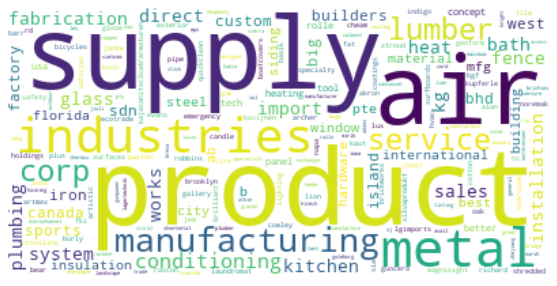

In [ ]:
mf = data[data['industry'] == 'Manufacturing']
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(mf[mf['subindustry']=='Other Miscellaneous Manufacturing']['keywords']))
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:

mf.groupby('subindustry').count()['name'].sort_values(ascending = False)

subindustry
Other Miscellaneous Manufacturing                              238
Machinery Manufacturing                                        131
Food Manufacturing                                             100
Electrical Equipment Appliance and Component Manufacturing      69
Apparel Manufacturing                                           37
Basic Chemical Manufacturing                                    29
Computer and Electronic Product Manufacturing                   23
Plastics and Rubber Products Manufacturing                      14
Wood Product Manufacturing                                      10
Soap Cleaning Compound and Toilet Preparation Manufacturing      5
Paper Manufacturing                                              3
Printing and Related Support Activities                          3
Fabricated Metal Product Manufacturing                           2
Transportation Equipment Manufacturing                           2
Name: name, dtype: int64

## Recommendations

More specific profiles of firmographic data could be achieved by imputing 'Others' categories in the SubIndustry. Often, companies in the other sections can be classified into a more specific catgeory through the keywords in their names. Hence, a text classification algorithm using the Bag of Words model could be produced to enhance the data.